# plotting functions of figure 5 in the manuscript
This figure shows the results of applying cryoDRGN to the covid spike trimer dataset (DESRES-Trajectory_sarscov2-11021571)



In [1]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import html

from sklearn.decomposition import PCA

# roodmus
from roodmus.analysis.utils import load_data
from roodmus.analysis.plot_heterogeneous_reconstruction import (
    plot_latent_space_scatter
)


In [2]:
# functions
def get_latents_cryodrgn(latent_file):
    latents = np.load(latent_file, allow_pickle=True)
    ndim = latents.shape[1]
    return latents, ndim

In [3]:
# data loading for DE-Shaw covid spike partially open set
project_dir = "/home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA"
config_dir = os.path.join(project_dir, "Micrographs")
figures_dir = os.path.join(project_dir, "figures")
meta_file = os.path.join(project_dir, "cryoDRGN", "run_data.star")
jobtypes = {
     os.path.join(project_dir, "cryoDRGN", "run_data.star"): "cryoDRGN",
}
latent_file =  os.path.join(project_dir, "cryoDRGN", "train_320", "z.19.pkl")

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
enable_tqdm = True

analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)

# latent_space, ndim = IO.get_latents_cs(latent_file)
latent_space, ndim = get_latents_cryodrgn(latent_file)
print(f"latent space dimensionality: {ndim}")
print(latent_space.shape)
for i in range(ndim):
    df_picked["latent_{}".format(i)] = latent_space[:, i]

# perform PCA on latent space and add PCA coordinates to the dataframe
pca = PCA(n_components=ndim)
pca.fit(latent_space)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
latent_space_pca = pca.transform(latent_space)
for i in range(ndim):
    df_picked["PCA_{}".format(i)] = latent_space_pca[:, i]
df_picked.tail()

loading metadata from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA/cryoDRGN/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA/cryoDRGN/run_data.star. determined file type: star


Dictionaries now contain 236079 reconstructed particles
added 236079 particles from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA/cryoDRGN/run_data.star


loading truth data: 100%|██████████| 900/900 [05:33<00:00,  2.70it/s, micrograph=000899.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 236079 particles and 270000 true particles
Added 270000 particles from /home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA/Micrographs
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 900
Number of micgrographs: 900
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 900/900 [01:18<00:00, 11.52it/s, precision=1, recall=0.913, multiplicity=0.917]    


time taken to compute precision: 78.71308708190918
latent space dimensionality: 8
(236079, 8)
[0.34525561 0.20052136 0.18091795 0.07645455 0.05701556 0.05364675
 0.04911879 0.03706943]
[1473.0095  1122.5753  1066.2916   693.16534  598.5933   580.6399
  555.5959   482.66205]


,metadata_filename,ugraph_filename,position_x,position_y,euler_phi,euler_theta,euler_psi,ugraph_shape,defocusU,defocusV,...,latent_6,latent_7,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
236074,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000899.mrc,376.0,3850.0,2.338725,0.883299,-2.220564,"(4000, 4000)",24628.760479,24622.810489,...,0.853905,-1.138333,-2.363344,1.830138,-0.479549,2.698066,-1.271472,0.978105,0.253866,0.839972
236075,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000899.mrc,301.0,149.0,2.451085,1.838115,-2.539222,"(4000, 4000)",24591.237560,24585.287570,...,1.672251,2.670263,1.226507,-0.818832,7.751886,-0.578354,-0.941580,0.860980,1.798372,0.832904
236076,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000899.mrc,1308.0,1928.0,-0.475328,1.797999,0.215465,"(4000, 4000)",24669.222376,24663.272386,...,1.769542,1.823054,-3.035154,-2.853709,0.905896,0.371722,0.492612,1.450781,-3.292291,-0.724566
236077,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000899.mrc,1989.0,3653.0,2.810736,0.842498,-2.138002,"(4000, 4000)",24666.868219,24660.918229,...,0.035980,-0.532794,-0.922090,-0.268039,0.849872,2.625922,1.854014,-1.690320,0.257759,0.238579
236078,/home/mjoosten1/projects/roodmus/data/DE-Shaw_...,000899.mrc,1484.0,2611.0,0.736101,1.816983,-2.445191,"(4000, 4000)",24633.333369,24627.383379,...,0.317724,0.633227,-2.741499,-0.433284,-0.439028,2.315337,-1.475157,0.168153,0.315721,-0.621154


## panel A
plotting latent space of epoch 20 of cryoDRGN with the FP particle picks plotted in red

number of FP: 92
number of TP: 235987


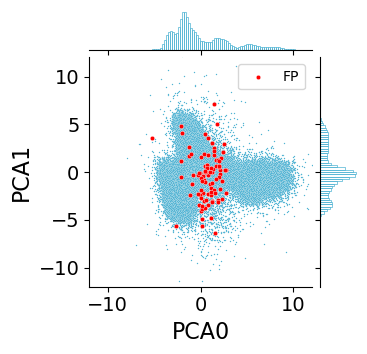

In [4]:
# latent space scatter plot
dim1=0
dim2=1

grid = plot_latent_space_scatter(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    color="#4eb3d3",
    pca=True
)
df_FP = df_picked[df_picked["TP"]==0]
print(f"number of FP: {len(df_FP)}")
print(f"number of TP: {len(df_picked)-len(df_FP)}")
ax = grid.fig.get_axes()[0]
sns.scatterplot(
    data=df_FP,
    x=f"PCA_{dim1}",
    y=f"PCA_{dim2}",
    color="red",
    s=10,
    ax=ax,
    label="FP",
)
grid.set_axis_labels(f"PCA{dim1}", f"PCA{dim2}", fontsize=16)
grid.figure.get_axes()[0].tick_params(labelsize=14)
grid.figure.get_axes()[0].set_xlim((-12, 12))
grid.figure.get_axes()[0].set_ylim((-12, 12))

grid.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_pca_{dim1}_{dim2}_FP.pdf"), bbox_inches="tight")
grid.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_pca_{dim1}_{dim2}_FP.png"), bbox_inches="tight", dpi=600)

## panel B
plot of the latent space with each point coloured by its corresponding frame from the MD trajecory

/tmp/ipykernel_7160/3154999598.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(S_m)


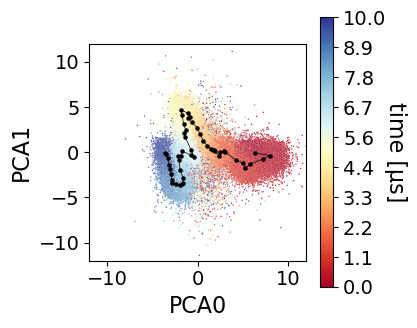

In [5]:
# latent space scatter plot, coloured by ground truth frames
dim1=0
dim2=1
dt = 1.2e-3# time between frames in microseconds

fig, ax = plot_latent_space_scatter(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    color_by="closest_pdb_index",
    palette="RdYlBu",
    pca=True,
)
# remove legend and add colorbar for the closest_pdb_index
ax.legend_.remove()
S_m = plt.cm.ScalarMappable(cmap="RdYlBu")
S_m.set_array(df_picked["closest_pdb_index"])
cbar = plt.colorbar(S_m)
cbar.set_label("time [\u03BCs]", rotation=270, labelpad=15, fontsize=16) # time in ps
# change the tick labels on the colorbar to go from 0 to 10 us
cbar.set_ticks(np.linspace(1, df_picked["closest_pdb_index"].max(), 10))
xticklabels = [np.round(r, 1) for r in np.linspace(1, df_picked["closest_pdb_index"].max(), 10)*dt]
cbar.set_ticklabels(xticklabels, fontsize=14)
ax.set_xlabel(f"PCA{dim1}", fontsize=16)
ax.set_ylabel(f"PCA{dim2}", fontsize=16)
ax.tick_params(labelsize=14)
ax.set_xlim((-12, 12))
ax.set_ylim((-12, 12))

# add trajectory to the plot
N_volumes = 50
pdb_indices = np.unique(df_picked["closest_pdb_index"])
d_pdbs = len(pdb_indices) // N_volumes

trajectory = np.zeros((N_volumes, ndim))
trajectory_pca = np.zeros((N_volumes, ndim))
for i in range(N_volumes):
    pdb_group = pdb_indices[i*d_pdbs:(i+1)*d_pdbs]
    mean_latent = df_picked[df_picked["closest_pdb_index"].isin(pdb_group)].agg(
        {f"latent_{i}": "mean" for i in range(ndim)}
    )
    trajectory[i] = mean_latent.values
    mean_pca = df_picked[df_picked["closest_pdb_index"].isin(pdb_group)].agg(
        {f"PCA_{i}": "mean" for i in range(ndim)}
    )
    trajectory_pca[i] = mean_pca.values

ax.scatter(trajectory_pca[:, 0], trajectory_pca[:, 1], s=5, c="black", zorder=10)
ax.plot(trajectory_pca[:, 0], trajectory_pca[:, 1], c="black", zorder=10, linewidth=0.5)
ax.set_aspect("equal")

fig.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_latent_space_scatter_colored_by_closest_pdb_index_pca.png"), dpi=600, bbox_inches="tight")
fig.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_latent_space_scatter_colored_by_closest_pdb_index_pca.pdf"), bbox_inches="tight")


## panel C
correlation matrix between the MD trajectory and the sampled volumes from the latent space

In [ ]:
# plot the correlation matrix
project_dir = "/home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA"
figures_dir = os.path.join(project_dir, "figures")
correlation_matrix_file = os.path.join(project_dir, "cryoDRGN", "analyze_320", "correlation_matrix.npy")
correlation_matrix = np.load(correlation_matrix_file)

frames = correlation_matrix.shape[0]

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(correlation_matrix, cmap="coolwarm")
yticks = np.linspace(0, frames, 10)
yticklabels = np.round(np.linspace(0, 10, 10, dtype=float), 1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_ylabel("time (\u03BCs)", fontsize=16)
ax.set_xlabel("sampled volume", fontsize=16)
cbar = ax.figure.colorbar(ax.get_images()[0], ax=ax, orientation="vertical", pad=0.01, shrink=0.9)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel("Correlation", fontsize=16, rotation=270, labelpad=20)
ax.tick_params(axis="both", which="major", labelsize=14)

fig.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_correlation_matrix.pdf"), bbox_inches="tight")


In [ ]:
# print the best and worst fir for every sampled volume to the MD trahjectory
pdb_dir = "/home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_spike_protein/mnt/parakeet_storage4/ConformationSampling/DESRES-Trajectory_sarscov2-11021571-all-glueCA/even_sampling_8334"
pdb_files = [r for r in os.listdir(pdb_dir) if r.endswith(".pdb")]
pdb_files.sort()
pdb_files = pdb_files[::int(len(pdb_files)/(frames+1))]
results = {
    "sampled_vol": [],
    "best_fit": [],
    "best_fit_index": [],
    "worst_fit": [],
    "worst_fit_index": [],
}
for i in range(frames):
    results["sampled_vol"].append(i)
    results["best_fit_index"].append(correlation_matrix[i].argmax())
    results["worst_fit_index"].append(correlation_matrix[i].argmin())
    results["best_fit"].append(pdb_files[correlation_matrix[i].argmax()])
    results["worst_fit"].append(pdb_files[correlation_matrix[i].argmin()])

df_results = pd.DataFrame(results)
df_results.head(n=len(df_results))



## panel D
For this panel I want to write the real-space croscc-correlation between each volume and the best matching frame from the MD trajectory

In [ ]:
# print for each sampled volume (column) the correlation with the best matching frame of the trajectory (row), and also the conformation index

pdb_dir = "/home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_spike_protein/mnt/parakeet_storage4/ConformationSampling/DESRES-Trajectory_sarscov2-11021571-all-glueCA/even_sampling_8334"
pdb_files = [os.path.join(pdb_dir, f) for f in os.listdir(pdb_dir) if f.endswith(".pdb")]
pdb_files.sort()
N = 50
pdb_files = pdb_files[::len(pdb_files)//N]

best_matching_frame = np.argmax(correlation_matrix, axis=0)
best_matching_frame_correlation = np.max(correlation_matrix, axis=0)
best_matching_conformation = [os.path.basename(pdb_files[r]) for r in best_matching_frame]

for i in range(N):
    print(f"{i} {best_matching_frame[i]} {best_matching_frame_correlation[i]} {best_matching_conformation[i]}")

In [ ]:
# for the first sampled volume, print the correlation with all frames of the trajectory
correlations = correlation_matrix[:, 0]
for i in range(frames):
    print(f"{i} {correlations[i]} {os.path.basename(pdb_files[i])}")

## panel E
zoom in of a selected atomic model and map from D. For this A attribute file needs to be made with the Q-scores from ChimeraX

In [ ]:
project_dir = "/home/mjoosten1/projects/roodmus/data/DE-Shaw_covid_spike_protein/20231116_DESRES-Trajectory_sarscov2-11021571-all-glueCA"
conformation = "007968"
# conformation = "008150"
conformation = "000163"
qscores_file = os.path.join(project_dir, f"chimeraX_qscores_table_conformation_{conformation}.txt")
df_qscores = pd.read_csv(qscores_file, sep="\t" , header=0, skiprows=[1])
df_qscores.tail()


In [ ]:
# create an attribute file for ChimeraX
attribute_file = os.path.join(project_dir, f"chimeraX_attributes_conformation_{conformation}.defattr")

recipient = "residues"
matchmode = "1-to-1"
modelnr = "4"

# write comments to the file explaining the attributes
with open(attribute_file, "w") as f:
    f.write(
        "# ChimeraX attributes file\n"
    )
    f.write(
        "# This file contains attributes for the residues of the SARS-CoV-2 spike protein\n"
    )
    f.write(
        "# The attributes are the q-scores of the residues\n"
    )

# write the recipient and match modelines
with open(attribute_file, "a") as f:
    f.write(
        f"recipient: {recipient}\n"
    )
    f.write(
        f"match mode: {matchmode}\n"
    )
    f.write(
        f"attribute: qscore\n"
    )

# add a line for each residue with the qscore as attribute
with open(attribute_file, "a") as f:
    for i, row in df_qscores.iterrows():
        atom_spec = f"#{modelnr}/{row['Chain']}:{row['Number']}"
        attribute = row["Qbb"]
        f.write(
            f"\t{atom_spec}\t{attribute}\n"
        )
        
